## Week 11 Assignment (Machine Learning 1)

<b>Title: Feature Scaling, Selection, and Constant Column Removal in Machine Learning with the Breast Cancer Dataset</b>

Objective: In this assignment, you will learn how to preprocess and select features in machine learning using Python. You will practice techniques such as feature scaling, feature selection using correlation analysis, and removal of constant columns with the breast cancer dataset from scikit-learn.

Tasks:

1. Import the necessary libraries: Start by importing the required libraries, including pandas, numpy, matplotlib, scikit-learn, and seaborn.

2. Load the dataset: Load the breast cancer dataset into a pandas DataFrame using the load_breast_cancer() function from scikit-learn (sklearn.datasets()).

3. Remove constant columns: Remove any columns in the dataset that have constant values.

4. Encode categorical features: If the dataset contains any categorical features, encode them using one-hot encoding or label encoding.

5. Feature scaling: Scale the numerical features using scikit-learn's StandardScaler or MinMaxScaler function.

6. Correlation analysis: Use seaborn's heatmap() function to plot a heatmap of the correlation matrix between the features. Identify highly correlated features and remove one of them.

7. Feature selection: Use scikit-learn's SelectKBest or SelectPercentile function to select the k best or top percentile features based on their correlation with the target variable.

Submission:

Submit a Jupyter Notebook file (.ipynb) containing your code, a brief explanation of your thought process for each task, and any necessary comments for clarity. Make sure to test your code and provide examples of the output for each task.

### 1) Import the necessary libraries: Start by importing the required libraries, including pandas, numpy, matplotlib, scikit-learn, and seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

### 2) Load the dataset: Load the breast cancer dataset into a pandas DataFrame using the load_breast_cancer() function from scikit-learn (sklearn.datasets()).

In [2]:
data = load_breast_cancer(as_frame = True)
data

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [3]:
dataset =  data["frame"]
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
dataset.isnull().sum() #checking for null values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### 3) Remove constant columns: Remove any columns in the dataset that have constant values.

In [5]:
var_T = VarianceThreshold()

In [6]:
var_T.fit(dataset)

VarianceThreshold()

In [7]:
var_T.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [8]:
dataset.columns[var_T.get_support() == False] #No constant columns a.k.a. columns with variance zero

Index([], dtype='object')

### 4) Encode categorical features: If the dataset contains any categorical features, encode them using one-hot encoding or label encoding.

In [9]:
dataset.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [10]:
dataset.dtypes[dataset.dtypes == 'object'] #No categorical data present in datatset

Series([], dtype: object)

### 5) Feature scaling: Scale the numerical features using scikit-learn's StandardScaler or MinMaxScaler function.

In [11]:
scaler = StandardScaler()

In [12]:
dataset_transformed_array = scaler.fit_transform(dataset.drop("target",axis = 1))

In [13]:
dataset_transformed_array

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
feature_columns = list(dataset.columns)
feature_columns.remove("target")
dataset_transformed = pd.DataFrame(dataset_transformed_array,columns=feature_columns)
dataset_transformed

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### 6) Correlation analysis: Use seaborn's heatmap() function to plot a heatmap of the correlation matrix between the features. Identify highly correlated features and remove one of them.

In [15]:
features_corr_matrix = dataset_transformed.corr(method='pearson')
features_corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


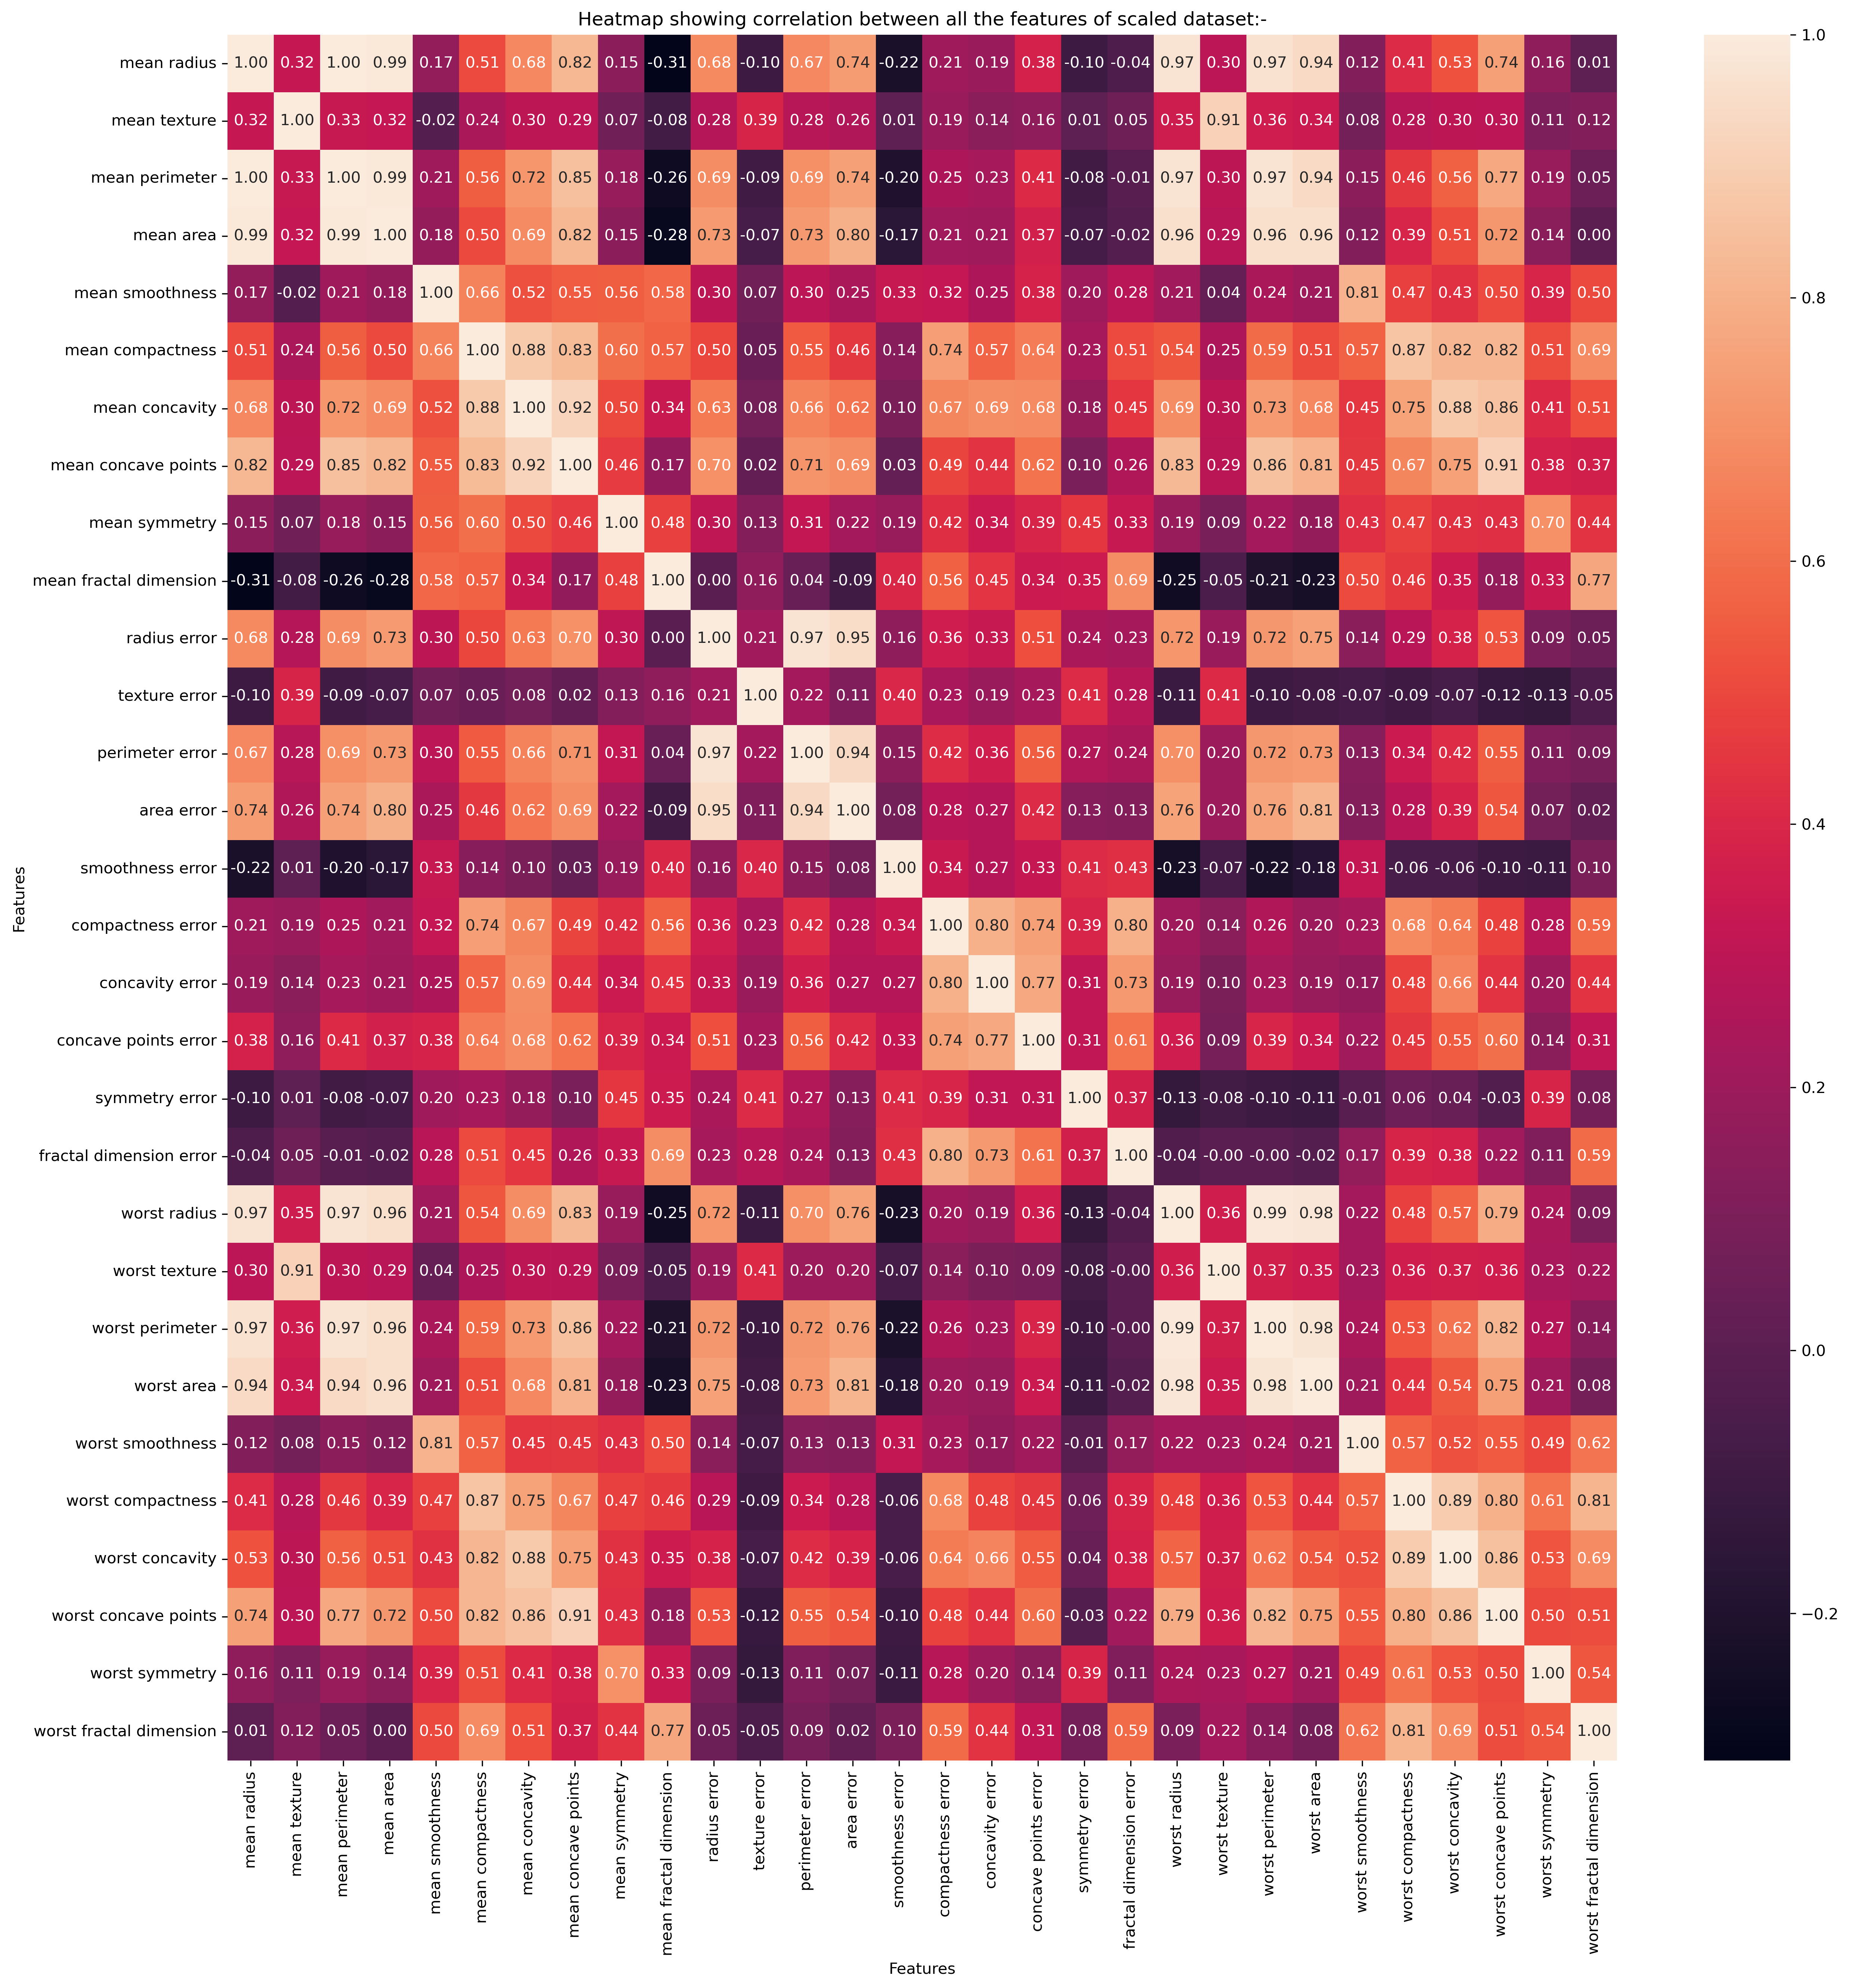

In [16]:
plt.figure(figsize=(20,20),dpi = 300)
sns.heatmap(features_corr_matrix,annot = True, fmt = "0.2f")
plt.title("Heatmap showing correlation between all the features of scaled dataset:-")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [17]:
threshold = 0.5
highly_correlated_columns_set = set()
for i in range(len(features_corr_matrix)):
    for j in range(i):
        if abs(features_corr_matrix[features_corr_matrix.columns[i]][features_corr_matrix.columns[j]]) > 0.5:
            col = features_corr_matrix.columns[i]
            highly_correlated_columns_set.add(col)
print(highly_correlated_columns_set)
print(len(highly_correlated_columns_set))

{'worst area', 'worst smoothness', 'worst concavity', 'mean perimeter', 'perimeter error', 'fractal dimension error', 'concave points error', 'mean area', 'radius error', 'worst symmetry', 'mean fractal dimension', 'compactness error', 'mean symmetry', 'worst compactness', 'worst texture', 'mean concavity', 'mean compactness', 'concavity error', 'mean concave points', 'worst perimeter', 'area error', 'worst fractal dimension', 'worst concave points', 'worst radius'}
24


In [18]:
no_correlation_transformed_dataset = dataset_transformed.drop(highly_correlated_columns_set,axis=1)
no_correlation_transformed_dataset

,mean radius,mean texture,mean smoothness,texture error,smoothness error,symmetry error
0,1.097064,-2.073335,1.568466,-0.565265,-0.214002,1.148757
1,1.829821,-0.353632,-0.826962,-0.876244,-0.605351,-0.805450
2,1.579888,0.456187,0.942210,-0.780083,-0.297005,0.237036
3,-0.768909,0.253732,3.283553,-0.110409,0.689702,4.732680
4,1.750297,-1.151816,0.280372,-0.790244,1.483067,-0.361092
...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.071025,1.086384,-1.138416
565,1.704854,2.085134,0.102458,2.260938,-0.424010,-0.189161
566,0.702284,2.045574,-0.840484,-0.257371,-0.379342,-0.891416
567,1.838341,2.336457,1.525767,0.686088,-0.173000,0.326634


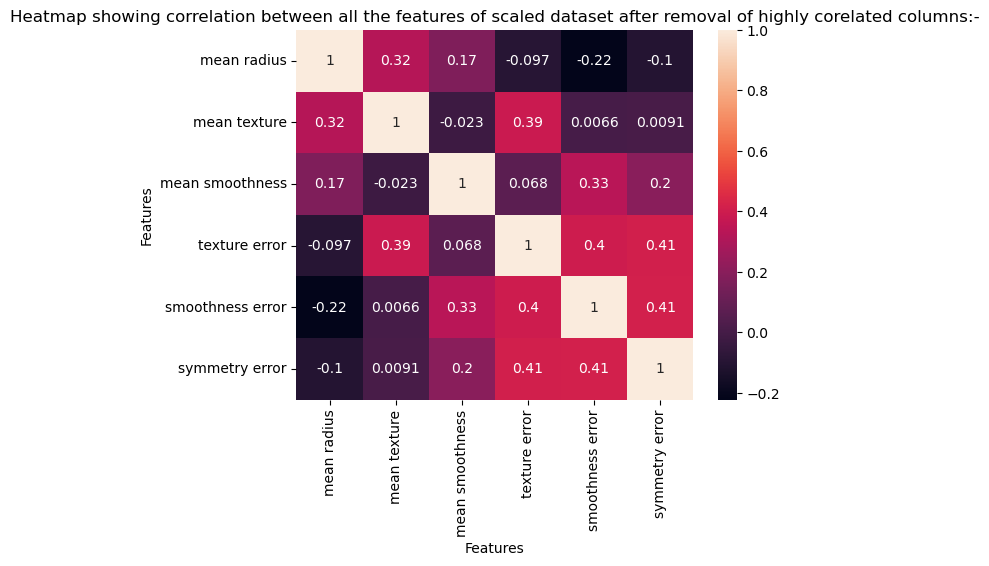

In [19]:
sns.heatmap(no_correlation_transformed_dataset.corr(),annot = True)
plt.title("Heatmap showing correlation between all the features of scaled dataset after removal of highly corelated columns:-")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

### 7) Feature selection: Use scikit-learn's SelectKBest or SelectPercentile function to select the k best or top percentile features based on their correlation with the target variable.

In [20]:
k=5 #Keeping k=5 in our case so that all the features of "(no_correlation_transformed_dataset" are selected
feature_columns = list(no_correlation_transformed_dataset.columns)
X = no_correlation_transformed_dataset[feature_columns]
y = dataset["target"]
selector = SelectKBest(mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)
selected_feature_names = [X.columns[index] for index in selected_features]
print("Selected Features: ",selected_feature_names)
individual_scores = selector.scores_[selected_features]
print("Individual scores:", individual_scores)

Selected Features:  ['mean radius', 'mean texture', 'mean smoothness', 'smoothness error', 'symmetry error']
Individual scores: [0.36390983 0.10181428 0.07522597 0.0167623  0.01562142]


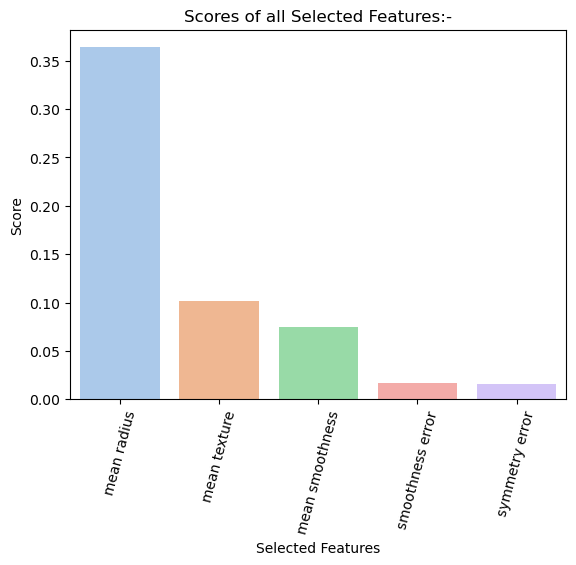

In [21]:
sns.barplot(x=np.array(selected_feature_names),y=np.array(individual_scores),hue = np.array(selected_feature_names),palette="pastel")
plt.xlabel("Selected Features")
plt.ylabel("Score")
plt.title("Scores of all Selected Features:-")
plt.xticks(rotation=75)
plt.show()